# Notebook para obtención de embeddings

## Instalación de dependencias de python

In [ ]:
## Dependencias
!pip install pandas
# !pip install json
!pip install pillow
!pip install openpyxl
!pip install requests
!pip install opencv-python
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install scipy
!pip install google-cloud-storage
!pip install google-cloud-vision
!pip install google-cloud-aiplatform

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.5/488.5 kB 7.6 MB/s eta 0:00:00


# Autenticación de Google Cloud

In [ ]:
# Autenticar el colab (NO funciona en vscode, buscar autenticación vía gcloud o service account: https://cloud.google.com/docs/authentication)
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
# Google Cloud
import vertexai
from vertexai.preview.generative_models import GenerativeModel
from vertexai.preview.language_models import TextGenerationModel

# Google Credentials
from google.auth.transport.requests import Request
from google.auth import default

def _get_local_credentials():
    from google.colab import auth

    # Authenticate the user to be able to use credentials.
    auth.authenticate_user()
    credentials, _ = default()
    credentials.refresh(Request())

    return credentials

PROJECT_ID = "image-search-liverpoolbigtable" #@param
REGION = "us-east4" #@param
vertexai.init(project=PROJECT_ID, location=REGION)

# model = GenerativeModel("gemini-1.5-pro-001")
# response = model.generate_content("De qué color es el cielo?")
# print(response.text)

In [ ]:
import pandas as pd
from io import BytesIO
from google.cloud import storage

bucket_name = "liverpool_search_data"

storage_client = storage.Client()
bucket = storage_client.bucket(bucket_name)

filename = "imgs.xlsx"

blob = bucket.blob(filename)
data = BytesIO(blob.download_as_bytes())

df = pd.read_excel(data)

SKU                                               Name  \
0     1067828492  Donkey Kong Country Tropical Freeze Edición Es...   
1     1100193261       Teclado gaming inalámbrico Logitech G915 TKL   
2     1069073693  Super Smash Bros Ultimate Estándar para Ninten...   
3     1097617844  Mouse inalámbrico Logitech Pebble M350 910-005773   
4     1093284182  Audífonos on - ear Astro A10 PS5 Alámbricos co...   
...          ...                                                ...   
1027  1047558961                       Cepillo de dientes Dr Browns   
1028  1039326198        Tetinas Tomme Tippee anticólico flujo medio   
1029  1008301057                              Bowl Nuby de Plástico   
1030  1097722401    Regulador de voltaje 2000 Watts Steren REG-2050   
1031  1051172894                                Tenis Vans de mujer   

                                              Atributos  \
0     DetalleDelJuegoGPO|NumeroDeJugadoresVaD=3|Deta...   
1     CaracteristicasGPO|RetroiluminacionVaD=3|Detal...   
2     DetalleDelJuegoGPO|NumeroDeJugadoresVaD=3|Deta...   
3     EnergiaGPO|DuracionDeLaBateriaVaD=4|Energía|50...   
4     EnergiaGPO|DuracionDeLaBateriaVaD=4|Energía|7|...   
...                                                 ...   
1027  GeneralGPO|ProductTypeSAP=1|General|19390|Prod...   
1028  GeneralGPO|ColoursLiverpoolAtt=1|General|3740|...   
1029  ComposicionGPO|MaterialDeLaTapaVaD=4|Composici...   
1030  9870|Material=9870|Material|Plástico,9000|Marc...   
1031  CaracteristicasGPO|DisciplineAtt=2|Detalles|2|...   

                                               Imagen 1  \
0     https://ss423.liverpool.com.mx/xl/1067828492_2...   
1     https://ss628.liverpool.com.mx/xl/1100193261_4...   
2      https://ss423.liverpool.com.mx/lg/1069073693.jpg   
3     https://ss628.liverpool.com.mx/xl/1097617844_4...   
4     https://ss423.liverpool.com.mx/xl/1093284182_4...   
...                                                 ...   
1027   https://ss417.liverpool.com.mx/lg/1047558961.jpg   
1028   https://ss417.liverpool.com.mx/lg/1039326198.jpg   
1029   https://ss417.liverpool.com.mx/lg/1008301057.jpg   
1030   https://ss343.liverpool.com.mx/lg/1097722401.jpg   
1031   https://ss203.liverpool.com.mx/lg/1051172894.jpg   

                                               Imagen 2  \
0     https://ss423.liverpool.com.mx/xl/1067828492_1...   
1     https://ss628.liverpool.com.mx/xl/1100193261_5...   
2      https://ss423.liverpool.com.mx/sm/1069073693.jpg   
3     https://ss628.liverpool.com.mx/xl/1097617844_5...   
4     https://ss423.liverpool.com.mx/xl/1093284182_1...   
...                                                 ...   
1027   https://ss417.liverpool.com.mx/sm/1047558961.jpg   
1028   https://ss417.liverpool.com.mx/sm/1039326198.jpg   
1029   https://ss417.liverpool.com.mx/sm/1008301057.jpg   
1030   https://ss343.liverpool.com.mx/sm/1097722401.jpg   
1031   https://ss203.liverpool.com.mx/sm/1051172894.jpg   

                                               Imagen 3  \
0     https://ss423.liverpool.com.mx/xl/1067828492_1...   
1     https://ss637.liverpool.com.mx/xl/1100193261_9...   
2     https://ss423.liverpool.com.mx/xl/1069073693_2...   
3     https://ss628.liverpool.com.mx/xl/1097617844_6...   
4     https://ss423.liverpool.com.mx/xl/1093284182_1...   
...                                                 ...   
1027   https://ss417.liverpool.com.mx/xl/1047558961.jpg   
1028   https://ss417.liverpool.com.mx/xl/1039326198.jpg   
1029   https://ss417.liverpool.com.mx/xl/1008301057.jpg   
1030   https://ss343.liverpool.com.mx/xl/1097722401.jpg   
1031   https://ss203.liverpool.com.mx/xl/1051172894.jpg   

                                               Imagen 4  \
0     https://ss423.liverpool.com.mx/xl/1067828492_3...   
1      https://ss637.liverpool.com.mx/lg/1100193261.jpg   
2     https://ss423.liverpool.com.mx/xl/1069073693_1...   
3      https://ss637.liverpool.com.mx/lg/1097617844.jpg   
4     https://ss423.liverpool

# Descarga de imágenes

In [ ]:
import requests
import os
from tqdm import tqdm

images_dir = 'imagenes_descargadas'
os.makedirs(images_dir, exist_ok=True)

def descargar_imagen(url, sku, index):
    """Descarga una imagen y la guarda con un nombre basado en el SKU y el índice."""
    img_path = os.path.join(images_dir, f"{sku}_{index}.jpg")
    try:
        response = requests.get(url, stream=True)
        if response.status_code == 200:
            with open(img_path, 'wb') as file:
                for chunk in response.iter_content(1024):
                    file.write(chunk)
        return img_path
    except Exception as e:
        print(f"Error descargando {url}: {e}")
        return None


imagenes_dict = {}
context_dict = {}

# Un total de 10 articulos.
max_iters = 10
idx = 0
for _, row in tqdm(df.iterrows()):
    if idx >= max_iters:
        break
    idx += 1

    sku = row['SKU']
    caracteristicas = row['Atributos']
    context_dict[sku] = caracteristicas

    imagenes_dict[sku] = []
    for i in range(1, 30):
        url = row.get(f'Imagen {i}')
        if pd.notna(url):  # Si la URL existe
            img_path = descargar_imagen(url, sku, i)
            if img_path:
                imagenes_dict[sku].append(img_path)

imagenes_dict

50it [03:39,  4.40s/it]


{1067828492: ['imagenes_descargadas/1067828492_1.jpg',
  'imagenes_descargadas/1067828492_2.jpg',
  'imagenes_descargadas/1067828492_3.jpg',
  'imagenes_descargadas/1067828492_4.jpg',
  'imagenes_descargadas/1067828492_5.jpg',
  'imagenes_descargadas/1067828492_6.jpg',
  'imagenes_descargadas/1067828492_7.jpg',
  'imagenes_descargadas/1067828492_8.jpg',
  'imagenes_descargadas/1067828492_9.jpg',
  'imagenes_descargadas/1067828492_10.jpg',
  'imagenes_descargadas/1067828492_11.jpg',
  'imagenes_descargadas/1067828492_12.jpg',
  'imagenes_descargadas/1067828492_13.jpg',
  'imagenes_descargadas/1067828492_14.jpg',
  'imagenes_descargadas/1067828492_15.jpg',
  'imagenes_descargadas/1067828492_16.jpg',
  'imagenes_descargadas/1067828492_17.jpg',
  'imagenes_descargadas/1067828492_18.jpg',
  'imagenes_descargadas/1067828492_19.jpg',
  'imagenes_descargadas/1067828492_20.jpg',
  'imagenes_descargadas/1067828492_21.jpg',
  'imagenes_descargadas/1067828492_22.jpg',
  'imagenes_descargadas/10678

# Preprocesamiento de imágenes

In [ ]:
from PIL import Image

def preprocesar_imagen(img_path, size=(224, 224)):
    """Redimensiona la imagen a un tamaño uniforme."""
    try:
        img = Image.open(img_path).convert("RGB")
        img = img.resize(size)
        return img
    except Exception as e:
        print(f"Error procesando {img_path}: {e}")
        return None

imagenes_procesadas = {sku: [preprocesar_imagen(img) for img in paths] for sku, paths in imagenes_dict.items()}
imagenes_procesadas

Error procesando imagenes_descargadas/1067828492_3.jpg: [Errno 2] No such file or directory: '/content/imagenes_descargadas/1067828492_3.jpg'
Error procesando imagenes_descargadas/1067828492_14.jpg: [Errno 2] No such file or directory: '/content/imagenes_descargadas/1067828492_14.jpg'
Error procesando imagenes_descargadas/1067828492_15.jpg: [Errno 2] No such file or directory: '/content/imagenes_descargadas/1067828492_15.jpg'
Error procesando imagenes_descargadas/1067828492_16.jpg: [Errno 2] No such file or directory: '/content/imagenes_descargadas/1067828492_16.jpg'
Error procesando imagenes_descargadas/1067828492_17.jpg: [Errno 2] No such file or directory: '/content/imagenes_descargadas/1067828492_17.jpg'
Error procesando imagenes_descargadas/1067828492_18.jpg: [Errno 2] No such file or directory: '/content/imagenes_descargadas/1067828492_18.jpg'
Error procesando imagenes_descargadas/1067828492_19.jpg: [Errno 2] No such file or directory: '/content/imagenes_descargadas/1067828492_19

{1067828492: [<PIL.Image.Image image mode=RGB size=224x224>,
  <PIL.Image.Image image mode=RGB size=224x224>,
  None,
  <PIL.Image.Image image mode=RGB size=224x224>,
  <PIL.Image.Image image mode=RGB size=224x224>,
  <PIL.Image.Image image mode=RGB size=224x224>,
  <PIL.Image.Image image mode=RGB size=224x224>,
  <PIL.Image.Image image mode=RGB size=224x224>,
  <PIL.Image.Image image mode=RGB size=224x224>,
  <PIL.Image.Image image mode=RGB size=224x224>,
  <PIL.Image.Image image mode=RGB size=224x224>,
  <PIL.Image.Image image mode=RGB size=224x224>,
  <PIL.Image.Image image mode=RGB size=224x224>,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  <PIL.Image.Image image mode=RGB size=224x224>,
  None,
  <PIL.Image.Image image mode=RGB size=224x224>,
  None,
  None,
  <PIL.Image.Image image mode=RGB size=224x224>,
  <PIL.Image.Image image mode=RGB size=224x224>,
  <PIL.Image.Image image mode=RGB size=224x224>],
 1100193261: [None,
  None,
  None,
  <PIL.Image.Image ima

# Parsing de atributos por producto

In [ ]:
parsed_context_dict = {}

for k, v in context_dict.items():
    context = ""
    atributos = v.split(',')
    for atributo in atributos:
        subatributos = atributo.split('|')
        description = subatributos[-2:]
        if len(description) < 2:
            continue
        context += f"{description[0]}:{description[1]},"
    parsed_context_dict[k] = context

parsed_context_dict


{1067828492: 'Número de jugadores:De 1 a 2 jugadores,Clasificación esrb:Mayores de 10 años,Descargable:No,Multiplataforma:No es multiplataforma,Género multimedia:Aventura,Tipo descargable:Físico,Desarrollador:Nintendo,Formato:Físico,Descripción de la ESRB:Contenido apto para todas las edades. Puede contener violencia mínima de caricatura y fantasía o uso de lenguaje moderado,Marca:SWITCH,VR (realidad virtual):No,Nombre del juego:Donkey Kong Country: Tropical Freeze Nsw,Método de activación:En la consola,Modo de juego:Tercera persona,Fecha de lanzamiento:4 de mayo del 2018,',
 1100193261: 'Retroiluminación:Sí,Conexión alámbrica / inalámbrica:Inalámbrica,Modelo comercial:G915 TKL,Largo del producto:37 cm,Garantía del fabricante:1 año,ManuallyGroupedFamily:true,Teclado numérico:No,Compatible con:Windows 7-8-10 o superior. MacOS 10.13 o superior,Color:Blanco,Longitud del cable:Sin cable,Marca:LOGITECH,Ancho del producto:18 cm,Producto:Teclado gamer,',
 1069073693: 'Número de jugadores:De 1

# Creación de embeddings por cada imagen con contexto

In [ ]:
import vertexai
import os
from vertexai.vision_models import Image, MultiModalEmbeddingModel

model = MultiModalEmbeddingModel.from_pretrained("multimodalembedding")

folder = "imagenes_descargadas"
list_of_images = os.listdir(folder)

images = {image_name: {"image_part":Image.load_from_file(f"{folder}/{image_name}")}
          for image_name in list_of_images}

for image in images:
    image_part = images[image]["image_part"]
    sku = int(image.split("_")[0])
    sku_context = parsed_context_dict[sku]
    embedding = model.get_embeddings(image=image_part, dimension=128,)
    images[image]["image_embedding"] = embedding.image_embedding

display(images)

{'1131225110_10.jpg': {'image_part': <vertexai.vision_models.Image at 0x792d12f3fd00>,
  'image_embedding': [0.00767739024,
   -0.0690509602,
   0.0333455019,
   -0.0179073159,
   -0.437727,
   0.11849419,
   0.0473664552,
   -0.0193731,
   0.0616075434,
   0.0613508895,
   0.0256809592,
   -0.0558243,
   -0.155230969,
   0.10891147,
   0.00403776392,
   0.021547446,
   0.0404297374,
   0.0157410242,
   -0.0131945377,
   0.0277885683,
   -0.026317263,
   -0.0527387671,
   -0.0352561474,
   -0.0394209,
   0.0169063415,
   0.0584625304,
   -0.0734461099,
   0.38910225,
   0.0531755574,
   -0.0181333944,
   0.00102115923,
   0.0896300748,
   0.0165943876,
   -0.03010091,
   -0.00180108368,
   -0.035290502,
   0.0709874928,
   0.0436288901,
   -0.04765689,
   -0.0638181493,
   0.071962744,
   -0.00359841599,
   0.0499925502,
   0.0355659463,
   0.0531451814,
   -0.0163051579,
   -0.0168725345,
   0.0247864779,
   0.00821446627,
   -0.0793437362,
   0.0447496958,
   0.0576642789,
   -0.0037

# Eliminación de duplicados

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def detectar_duplicados():
    """Calcula la similitud coseno entre embeddings y devuelve pares de imágenes duplicadas."""
    duplicados = []
    n = len(images)
    for i, k in enumerate(images):
        for l, j in enumerate(images):
            if l < i:
                continue
            if k == j:
                continue
            # Convertir a numpy después de separar del cálculo de gradientes
            similitud = cosine_similarity(
                [images[k]["image_embedding"]],
                [images[j]["image_embedding"]]
            ).item()
            if similitud >= 0.99:  # Umbral de similitud
                duplicados.append((k, j, similitud))
    return duplicados


def eliminar_duplicados(duplicados):
    for dup in duplicados:
        if dup[1] in images:
            os.remove(f"/content/imagenes_descargadas/{dup[1]}")
            del images[dup[1]]
    return images


duplicados = detectar_duplicados()
display(duplicados)
dups_eliminados = eliminar_duplicados(duplicados)


[]

# Clustering (ANN)

### Gráfica de número de clusters vs epsilon
Notamos que un epsilon de 0.2 es un número intermedio de clusters ideal

In [ ]:
# Applying dbscan to find similar images
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
#from sklearn.preprocessing import StandardScaler

Epsilon = np.linspace(0.001, 0.9, 15)
METRIC = 'euclidean' # 'cosine'

num_clusters = {}
for epsilon in Epsilon:
    dbscan = DBSCAN(eps=epsilon, metric=METRIC, min_samples=1)
    embeddings = [images[image]["image_embedding"] for image in images]
    classes = dbscan.fit_predict(embeddings)
    num_classes = len(set(classes))
    num_clusters[epsilon] = num_classes

# plot the number of clusters vs epsilon
plt.plot(Epsilon, list(num_clusters.values()))
plt.xlabel('Epsilon')
plt.ylabel('Number of Clusters')
plt.title('Number of Clusters vs Epsilon')
plt.show()

NameError: name 'images' is not defined

# Clustering con epsilon = 0.20

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN

epsilon = 0.20
dbscan = DBSCAN(eps=epsilon, metric='euclidean', min_samples=1)
embeddings = [images[image]["image_embedding"] for image in images]
classes = dbscan.fit_predict(embeddings)
display(classes)
print("Using ",len(set(classes)), " clusters")

NameError: name 'METRIC' is not defined

Cluster 10:
	1074305741_10.jpg


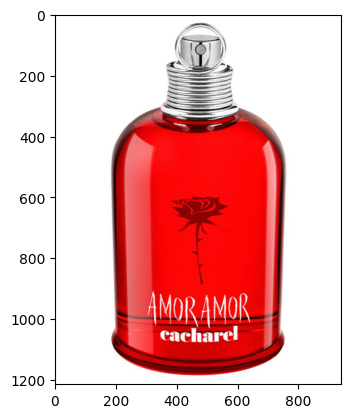

	1074305741_9.jpg


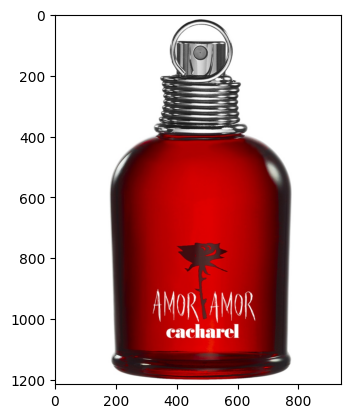

Cluster 12:
	1073078431_10.jpg


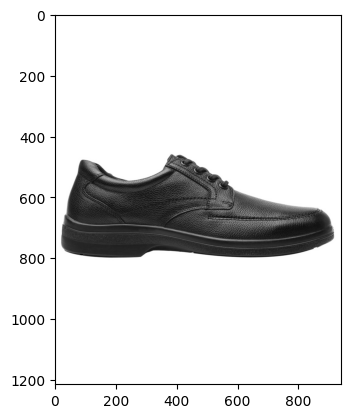

	1073078431_3.jpg


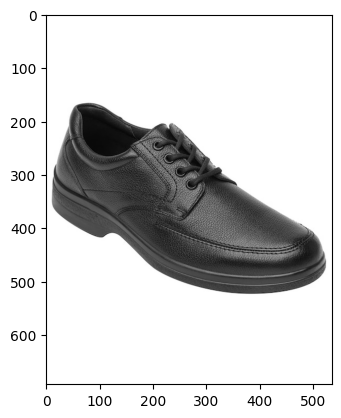

	1073078431_6.jpg


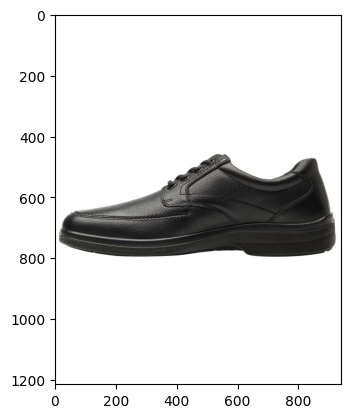

	1073078431_11.jpg


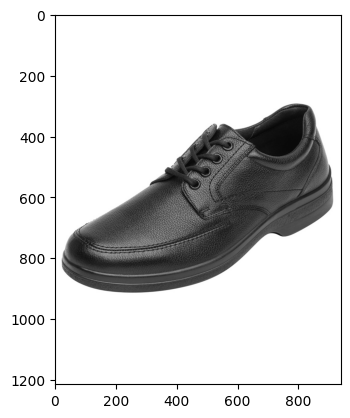

Cluster 13:
	1148074235_6.jpg


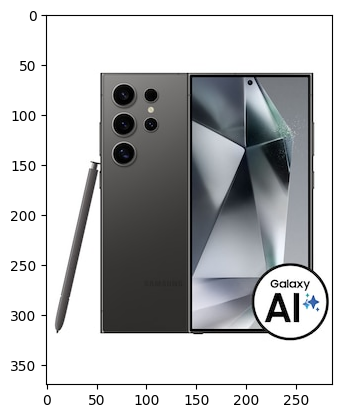

	1148074235_16.jpg


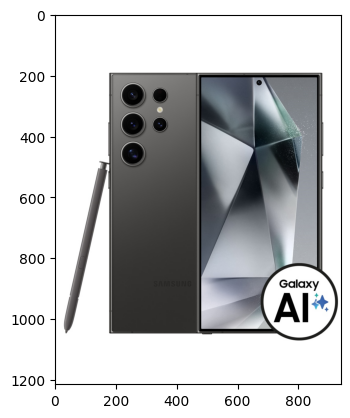

Cluster 14:
	1100193261_4.jpg


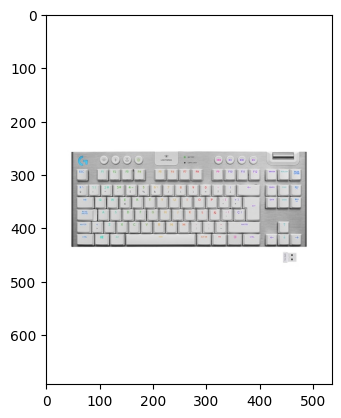

	1100193261_20.jpg


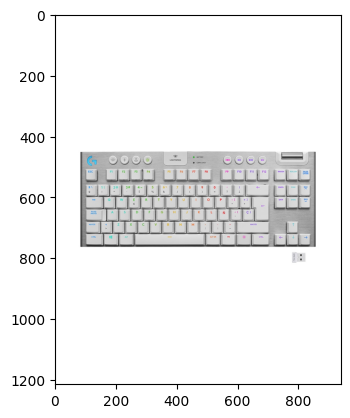

Cluster 18:
	1093284182_5.jpg


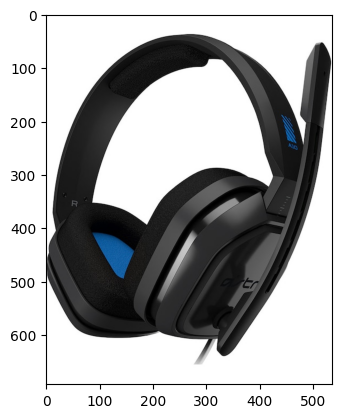

	1093284182_9.jpg


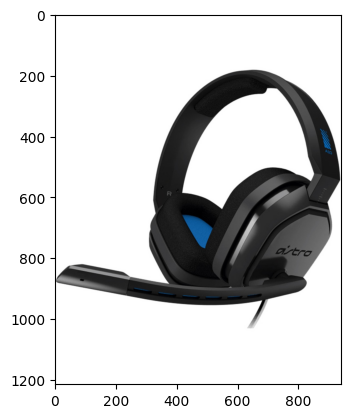

	1093284182_6.jpg


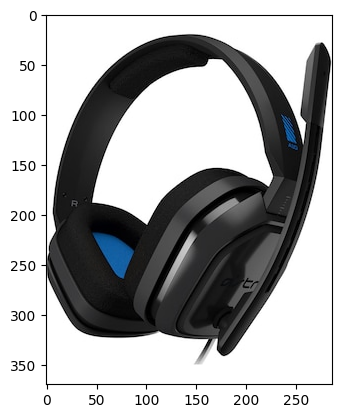

Cluster 23:
	1006638160_3.jpg


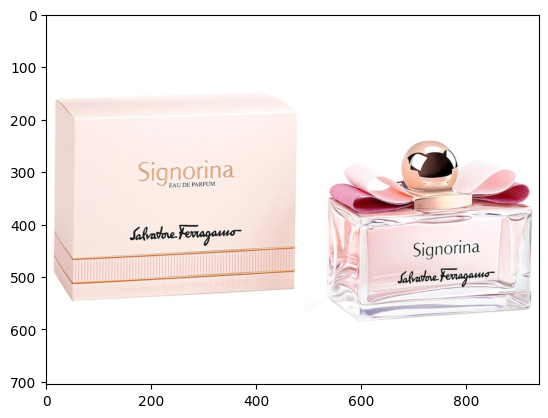

	1006638160_11.jpg


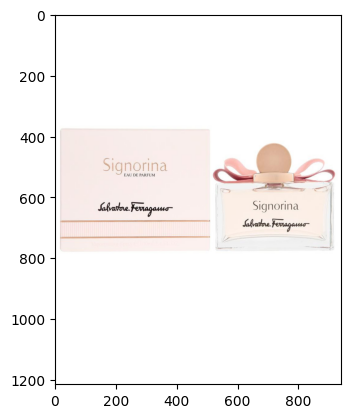

	1006638160_13.jpg


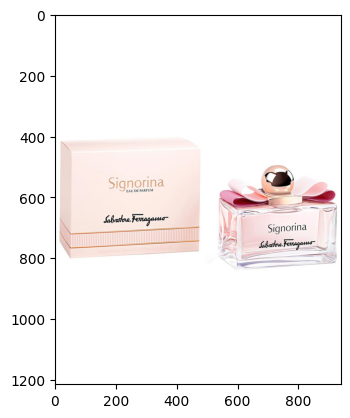

Cluster 38:
	1118150312_15.jpg


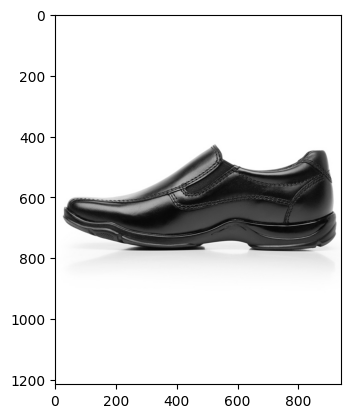

	1118150312_8.jpg


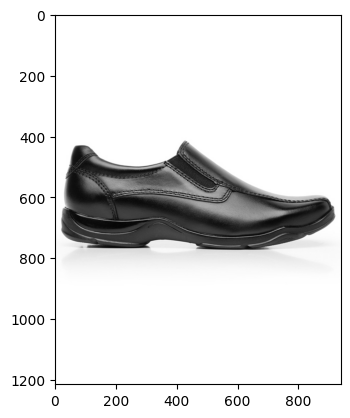

Cluster 54:
	1118150312_11.jpg


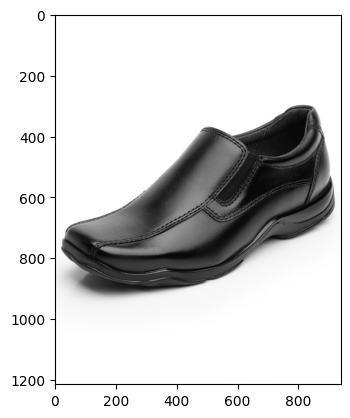

	1118150312_17.jpg


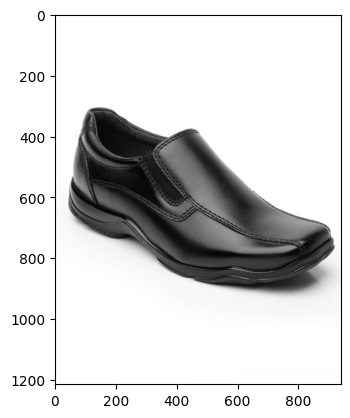

Cluster 65:
	1148074235_18.jpg


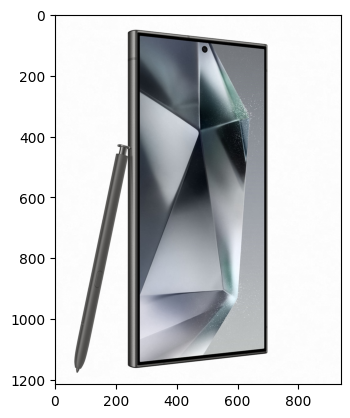

	1148074235_17.jpg


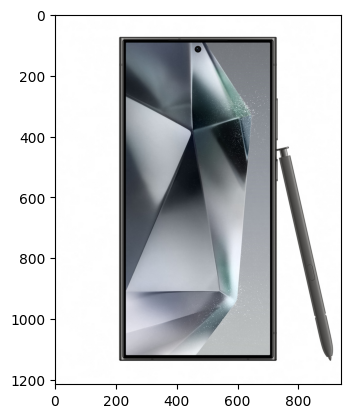

Cluster 78:
	1097617844_4.jpg


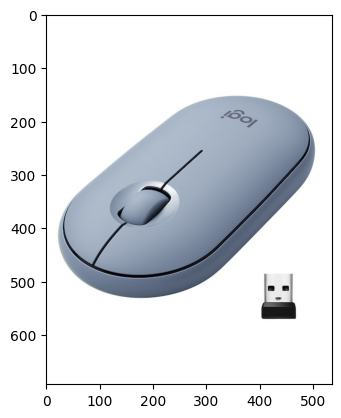

	1097617844_21.jpg


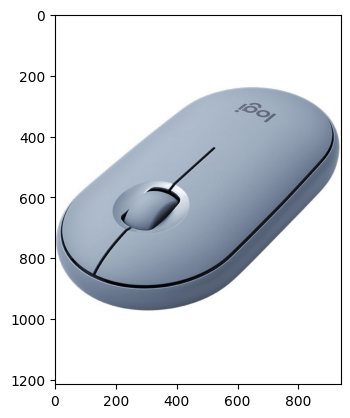

	1097617844_5.jpg


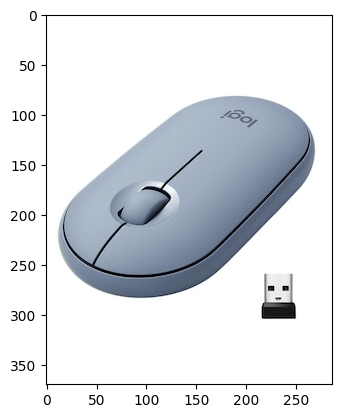

In [ ]:
from PIL import Image

clusters_with_repeated_images = [int(cluster_num) for cluster_num in set(classes) if list(classes).count(cluster_num) > 1]

clusters_with_repeated_images

for cluster in clusters_with_repeated_images:
    print(f"Cluster {cluster}:")
    for i, image in enumerate(images):
        if classes[i] == cluster:
            print(f"\t{image}")
            # show image
            plt.imshow(Image.open(f"{folder}/{image}"))
            plt.show()

# Pasar los embeddings a JSON.

In [ ]:
import json

final_images = images.copy()
for image in final_images:
    del final_images[image]["image_part"]

with open('/content/embeddings.json', 'w') as f:
    json.dump(final_images, f)

# Imagenes similares a una dada por el producto

In [ ]:
import vertexai
import os
from io import BytesIO
from vertexai.vision_models import MultiModalEmbeddingModel
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity

model = MultiModalEmbeddingModel.from_pretrained("multimodalembedding")

def embed_input_image(img_part):
    global model

    embed = model.get_embeddings(image=img_part, dimension=128,)
    return embed.image_embedding


def preprocesar_imagen(img_path, size=(336, 336)):
    """Redimensiona la imagen a un tamaño uniforme."""
    try:
        img = Image.open(img_path).convert("RGB")
        img = img.resize(size)
        buffer = BytesIO()
        img.save(buffer, format='PNG')
        img = vertexai.vision_models.Image(buffer.getvalue())
        return img
    except Exception as e:
        print(f"Error procesando {img_path}: {e}")
        return None


def get_matches(embedding, embeddings):
    # Step 2: Calculate cosine similarities
    # Convert embeddings to numpy arrays for efficient calculation if necessary
    matches = []
    n = len(embeddings)
    for i in embeddings:
        similitud = cosine_similarity(
            [embedding],
            [embeddings[i]["embedding"]]
        ).item()
        if similitud >= 0.8:  # Umbral de similitud
            matches.append((i, similitud))
    return matches


def comparar_imagen(img_name):
    global images
    img_path = f"/content/inputs/{img_name}"
    img_part = preprocesar_imagen(img_path)
    if img_part is None:
        return None
    embeddings = embed_input_image(img_part)
    matches = get_matches(embeddings, images)
    return matches


comparar_imagen("smash.jpg")